In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Unión de Dataframes

In [7]:
#'''
# Load the DataFrame from the HDF5 file
Train_Air = pd.read_hdf('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Air Quality/Train/Train_set_1A.h5', key='df')
Train_Mob = pd.read_hdf('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Mobilidad/Train/Mobilidad_1A.h5 ', key='df')

Train_Air = Train_Air.reset_index()

# Cambiar el nombre de la columna
Train_Air.rename(columns={'comuna': 'codigo comuna',
                 'Fecha_Hora':'Fecha Trafico'}, inplace=True)

Train_Mob.reset_index()

# Realizar un inner join entre los dos DataFrames
#df_joined = pd.merge(Train_Mob, Train_Air, on=['Fecha Trafico', 'codigo comuna'], how='left')
#'''


,index,Hora,dia-num,mes-num,año,Velocidad (Km/h),Intensidad,Nº vehiculos long 1,Nº vehiculos long 2,Nº vehiculos long 3,Ocupación,Longitud,Latitud,codigo comuna,operacion_enc,corredor_enc,sentido_enc,Fecha Trafico
0,0,0.0,5.0,1.0,2021.0,33.0,18.0,18.0,0.0,0.0,0.0,833398.250,1181104.375,16.0,1.0,50.0,2.0,2021-01-01 00:00:00
1,1,1.0,5.0,1.0,2021.0,38.0,24.0,23.0,1.0,0.0,0.0,833398.250,1181104.375,16.0,1.0,50.0,2.0,2021-01-01 01:00:00
2,2,2.0,5.0,1.0,2021.0,32.0,16.0,16.0,0.0,0.0,0.0,833398.250,1181104.375,16.0,1.0,50.0,2.0,2021-01-01 02:00:00
3,3,3.0,5.0,1.0,2021.0,35.0,15.0,15.0,0.0,0.0,0.0,833398.250,1181104.375,16.0,1.0,50.0,2.0,2021-01-01 03:00:00
4,4,4.0,5.0,1.0,2021.0,34.0,15.0,15.0,0.0,0.0,0.0,833398.250,1181104.375,16.0,1.0,50.0,2.0,2021-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6011927,6011927,19.0,5.0,9.0,2022.0,24.0,103.0,59.0,0.0,0.0,2.0,834089.643,1179095.693,14.0,1.0,5.0,3.0,2022-09-30 19:00:00
6011928,6011928,20.0,5.0,9.0,2022.0,21.0,77.0,54.0,1.0,0.0,1.0,834089.643,1179095.693,14.0,1.0,5.0,3.0,2022-09-30 20:00:00
6011929,6011929,21.0,5.0,9.0,2022.0,19.0,88.0,64.0,0.0,0.0,2.0,834089.643,1179095.693,14.0,1.0,5.0,3.0,2022-09-30 21:00:00
6011930,6011930,22.0,5.0,9.0,2022.0,17.0,41.0,28.0,0.0,0.0,0.0,834089.643,1179095.693,14.0,1.0,5.0,3.0,2022-09-30 22:00:00


In [10]:
# Verificar si las combinaciones de 'Fecha Trafico' y 'codigo comuna' son únicas en Train_Mob
print(Train_Mob.duplicated(subset=['Fecha Trafico', 'codigo comuna']).sum())

# Verificar si las combinaciones de 'Fecha Trafico' y 'codigo comuna' son únicas en Train_Air
print(Train_Air.duplicated(subset=['Fecha Trafico', 'codigo comuna']).sum())


5928155
42288


In [17]:
# Crear un DataFrame con combinaciones únicas de fechas y comunas en Train_Mob
combinaciones_mob = Train_Mob[['Fecha Trafico', 'codigo comuna']].drop_duplicates()

# Crear un DataFrame con combinaciones únicas de fechas y comunas en Train_Air
combinaciones_air = Train_Air[['Fecha Trafico', 'codigo comuna']].drop_duplicates()

# Contar las combinaciones en Train_Mob
conteo_mob = combinaciones_mob.groupby('codigo comuna').size()

# Contar las combinaciones en Train_Air
conteo_air = combinaciones_air.groupby('codigo comuna').size()

# Crear un DataFrame para comparar
comparacion = pd.DataFrame({'Mob': conteo_mob, 'Air': conteo_air}).fillna(0)

# Verificar diferencias
diferencias = comparacion[comparacion['Mob'] != comparacion['Air']]

if not diferencias.empty:
    print("Diferencias encontradas:\n", diferencias)
else:
    print("Las fechas se repiten para cada comuna en ambos DataFrames.")


Diferencias encontradas:
                    Mob    Air
codigo comuna                
4.0            20357.0  21144
8.0                0.0  21144
10.0           21140.0  21144
14.0           21140.0  21144
16.0           21140.0  21144


hay diferencias entre los datasets principalmente en los datos de la comuna 4 donde faltan 787 datos en las demas faltan 4 que corresponden a los outliers de intensidad que borre, en vezx de borrarlos hay que ajustarlos, cambiarlos por la media

In [22]:
combinaciones_mob.describe()

,Fecha Trafico,codigo comuna
count,83777,83777.000000
mean,2022-03-21 07:44:43.423851264,11.065424
min,2021-01-01 00:00:00,4.000000
25%,2021-08-14 22:00:00,10.000000
50%,2022-03-21 12:00:00,14.000000
75%,2022-10-25 18:00:00,16.000000
max,2023-05-31 23:00:00,16.000000
std,NaN,4.553490


In [11]:
df_joined = pd.read_csv('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Programacion/Train_Dataset_joined.csv')
#df_joined.to_csv('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Programacion/Train_Dataset_joined.csv', mode='w')

In [12]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8851329 entries, 0 to 8851328
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   Fecha Trafico        object 
 2   Hora                 float64
 3   dia-num              float64
 4   mes-num              float64
 5   año                  float64
 6   Velocidad (Km/h)     float64
 7   Intensidad           float64
 8   Nº vehiculos long 1  float64
 9   Nº vehiculos long 2  float64
 10  Nº vehiculos long 3  float64
 11  Ocupación            float64
 12  Longitud             float64
 13  Latitud              float64
 14  codigo comuna        float64
 15  operacion_enc        float64
 16  corredor_enc         float64
 17  sentido_enc          float64
 18  pm_25                float64
dtypes: float64(17), int64(1), object(1)
memory usage: 1.3+ GB


In [78]:
def missing_values(df):
    Column_Names = df.columns

    Total_rows = df.shape[0]

    missing_values = df.isnull().sum()

    Percent_missing = (missing_values / Total_rows)*100
    
    result = pd.DataFrame({
        'Column_Name': Column_Names,
        'Missing_Values': missing_values.values,
        'Total_Rows': Total_rows,
        'Percent_Missing': Percent_missing.values
    })

    return result

In [79]:
missing_values(df_joined)

,Column_Name,Missing_Values,Total_Rows,Percent_Missing
0,Unnamed: 0,0,8851329,0.0
1,Fecha Trafico,0,8851329,0.0
2,Hora,0,8851329,0.0
3,dia-num,0,8851329,0.0
4,mes-num,0,8851329,0.0
5,año,0,8851329,0.0
6,Velocidad (Km/h),0,8851329,0.0
7,Intensidad,0,8851329,0.0
8,Nº vehiculos long 1,0,8851329,0.0
9,Nº vehiculos long 2,0,8851329,0.0


In [80]:
df_joined = df_joined.drop(['Unnamed: 0', 'Hora', 'dia-num', 'mes-num', 'año', 'Longitud','Latitud', 'Ocupación'], axis =1)

In [81]:
df_joined.head()

,Fecha Trafico,Velocidad (Km/h),Intensidad,Nº vehiculos long 1,Nº vehiculos long 2,Nº vehiculos long 3,codigo comuna,operacion_enc,corredor_enc,sentido_enc,pm_25
0,2021-01-01 00:00:00,33.0,18.0,18.0,0.0,0.0,16.0,1.0,50.0,2.0,50.9890
1,2021-01-01 00:00:00,33.0,18.0,18.0,0.0,0.0,16.0,1.0,50.0,2.0,23.7741
2,2021-01-01 01:00:00,38.0,24.0,23.0,1.0,0.0,16.0,1.0,50.0,2.0,75.9334
3,2021-01-01 01:00:00,38.0,24.0,23.0,1.0,0.0,16.0,1.0,50.0,2.0,28.5095
4,2021-01-01 02:00:00,32.0,16.0,16.0,0.0,0.0,16.0,1.0,50.0,2.0,37.9219


In [82]:
df_joined['Fecha Trafico']= pd.to_datetime(df_joined['Fecha Trafico'], 'coerce')

In [83]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8851329 entries, 0 to 8851328
Data columns (total 11 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Fecha Trafico        datetime64[ns]
 1   Velocidad (Km/h)     float64       
 2   Intensidad           float64       
 3   Nº vehiculos long 1  float64       
 4   Nº vehiculos long 2  float64       
 5   Nº vehiculos long 3  float64       
 6   codigo comuna        float64       
 7   operacion_enc        float64       
 8   corredor_enc         float64       
 9   sentido_enc          float64       
 10  pm_25                float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 742.8 MB


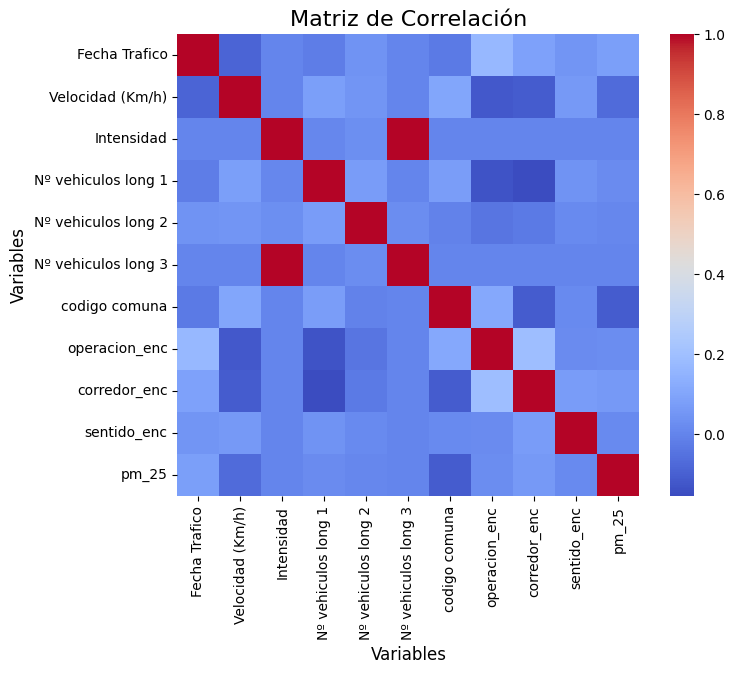

In [84]:
# Calcular la matriz de correlación
correlation_matrix = df_joined.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear un mapa de calor (heatmap) de la matriz de correlación
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, cbar=True)

# Títulos y etiquetas
plt.title('Matriz de Correlación', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)

# Mostrar la visualización
plt.show()

In [86]:
duplicados = df_joined[df_joined.duplicated(subset=['Fecha Trafico','codigo comuna', 'corredor_enc', 'sentido_enc'], keep=False)]


conteo_duplicados = df_joined.duplicated(subset=['Fecha Trafico','codigo comuna', 'corredor_enc', 'sentido_enc']).sum()
conteo_duplicados 

7258154

In [87]:
duplicados

,Fecha Trafico,Velocidad (Km/h),Intensidad,Nº vehiculos long 1,Nº vehiculos long 2,Nº vehiculos long 3,codigo comuna,operacion_enc,corredor_enc,sentido_enc,pm_25
0,2021-01-01 00:00:00,33.0,18.0,18.0,0.0,0.0,16.0,1.0,50.0,2.0,50.9890
1,2021-01-01 00:00:00,33.0,18.0,18.0,0.0,0.0,16.0,1.0,50.0,2.0,23.7741
2,2021-01-01 01:00:00,38.0,24.0,23.0,1.0,0.0,16.0,1.0,50.0,2.0,75.9334
3,2021-01-01 01:00:00,38.0,24.0,23.0,1.0,0.0,16.0,1.0,50.0,2.0,28.5095
4,2021-01-01 02:00:00,32.0,16.0,16.0,0.0,0.0,16.0,1.0,50.0,2.0,37.9219
...,...,...,...,...,...,...,...,...,...,...,...
8851324,2022-09-30 19:00:00,24.0,103.0,59.0,0.0,0.0,14.0,1.0,5.0,3.0,17.9554
8851325,2022-09-30 20:00:00,21.0,77.0,54.0,1.0,0.0,14.0,1.0,5.0,3.0,25.0210
8851326,2022-09-30 21:00:00,19.0,88.0,64.0,0.0,0.0,14.0,1.0,5.0,3.0,16.6477
8851327,2022-09-30 22:00:00,17.0,41.0,28.0,0.0,0.0,14.0,1.0,5.0,3.0,13.0697


(array([3.329574e+06, 4.046333e+06, 1.106171e+06, 2.944060e+05,
        5.333900e+04, 1.092100e+04, 7.341000e+03, 2.669000e+03,
        3.520000e+02, 1.260000e+02, 4.900000e+01, 2.200000e+01,
        1.300000e+01, 6.000000e+00, 3.000000e+00]),
 array([  1.        ,  17.86666667,  34.73333333,  51.6       ,
         68.46666667,  85.33333333, 102.2       , 119.06666667,
        135.93333333, 152.8       , 169.66666667, 186.53333333,
        203.4       , 220.26666667, 237.13333333, 254.        ]),
 <BarContainer object of 15 artists>)

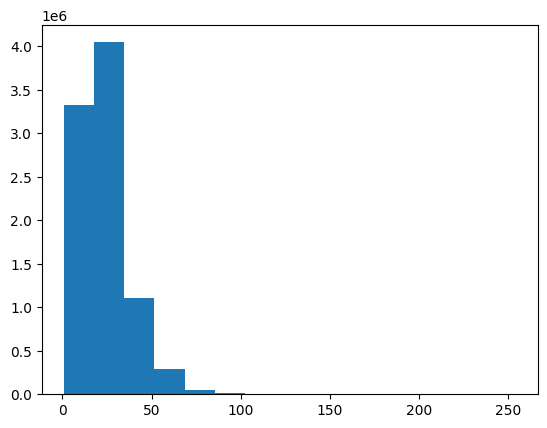

In [62]:
import matplotlib.pyplot as plt

plt.hist(df_joined_sin_outliers['Velocidad (Km/h)'], bins = 15)

In [21]:
df_joined.describe()

,Velocidad (Km/h),Intensidad,Nº vehiculos long 1,Nº vehiculos long 2,Nº vehiculos long 3,codigo comuna,operacion_encoded,corredor_encoded,pm_25
count,8.851329e+06,8.851329e+06,8.851329e+06,8.851329e+06,8.851329e+06,8.851329e+06,8.851329e+06,8.851329e+06,8.851329e+06
mean,2.341389e+01,3.370283e+02,2.052480e+02,3.308407e+01,4.484232e+01,1.239213e+01,1.092258e+00,1.810634e+01,1.887591e+01
std,1.348883e+01,6.778985e+04,1.725915e+02,3.162683e+02,6.778115e+04,2.883313e+00,3.868798e-01,1.809458e+01,9.899796e+00
min,1.000000e+00,-2.088808e+01,-1.644085e+02,-1.693988e+02,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.400000e+01,1.090000e+02,6.900000e+01,1.000000e+00,0.000000e+00,1.000000e+01,1.000000e+00,4.000000e+00,1.200000e+01
50%,2.100000e+01,2.520000e+02,1.630000e+02,1.000000e+01,3.000000e+00,1.400000e+01,1.000000e+00,8.000000e+00,1.730370e+01
75%,2.900000e+01,4.560000e+02,3.030000e+02,3.200000e+01,2.100000e+01,1.400000e+01,1.000000e+00,3.200000e+01,2.426280e+01
max,2.540000e+02,2.015893e+08,2.646000e+03,9.175040e+05,2.015892e+08,1.600000e+01,2.000000e+00,5.600000e+01,9.200000e+01


In [44]:
# Selecciona la columna que deseas analizar, por ejemplo 'columna_datos'
Q1 = df_joined['Intensidad'].quantile(0.25)
Q3 = df_joined['Intensidad'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites de outliers
limite_inferior = Q1 - 100 * IQR
limite_superior = Q3 + 100 * IQR

# Identificar outliers
outliers = df_joined[(df_joined['Intensidad'] < limite_inferior) | (df_joined['Intensidad'] > limite_superior)]
print("Outliers encontrados:\n", outliers)

# Eliminar outliers
df_joined_sin_outliers = df_joined[~((df_joined['Intensidad'] < limite_inferior) | (df_joined['Intensidad'] > limite_superior))]


Outliers encontrados:
               Fecha Trafico  Velocidad (Km/h)   Intensidad  \
4756186 2021-04-02 08:00:00              33.0  201589260.0   
4756291 2021-04-06 17:00:00              17.0    1572919.0   
4756483 2021-04-14 19:00:00              21.0    5898266.0   
4756522 2021-04-16 10:00:00              31.0      74266.0   

         Nº vehiculos long 1  Nº vehiculos long 2  Nº vehiculos long 3  \
4756186                  8.0                  0.0          201589248.0   
4756291                 24.0                  0.0            1572864.0   
4756483                 12.0             917504.0            4980736.0   
4756522                  8.0                  1.0              74240.0   

         codigo comuna  operacion_encoded  corredor_encoded     pm_25  
4756186           14.0                1.0              35.0  16.80310  
4756291           14.0                1.0              35.0   9.84592  
4756483           14.0                1.0              35.0  10.92550  
4756522

In [38]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8851329 entries, 0 to 8851328
Data columns (total 10 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Fecha Trafico        datetime64[ns]
 1   Velocidad (Km/h)     float64       
 2   Intensidad           float64       
 3   Nº vehiculos long 1  float64       
 4   Nº vehiculos long 2  float64       
 5   Nº vehiculos long 3  float64       
 6   codigo comuna        float64       
 7   operacion_encoded    float64       
 8   corredor_encoded     float64       
 9   pm_25                float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 675.3 MB


In [46]:
num_fechas_unicas = df_joined_sin_outliers['Fecha Trafico'].nunique()
print(f"Número de fechas únicas: {num_fechas_unicas}")

(num_fechas_unicas / 24) /365

Número de fechas únicas: 21140


2.41324200913242

In [64]:
df_joined_sin_outliers.to_csv('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Programacion/Unificado.csv', mode='w')